# Notebook 20: Introduction to statistical regression
***

We'll need Numpy, Matplotlib, and scipy.stats for this notebook, so let's load them. 

In [1]:
import numpy as np 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline


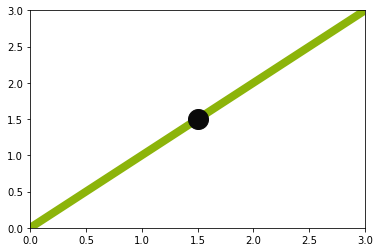

In [2]:
# Create you own colors for use later in this notebook
# Here are my two chosen colors.
# Choosing ratios of RBG out of 2^8 = 256?
almostblack = np.array([10,10,10])/255
mycolor = np.array([140,180,10])/255

x = np.linspace(0,5,10)
y = x
fig, ax = plt.subplots()
line = ax.plot(x,y,color=mycolor, linewidth=8)
marker = ax.plot(1.5, 1.5, color= almostblack, marker="o", markersize=20)
ax.set_ylim([0,3])
ax.set_xlim([0,3])
frame1 = plt.gca()



## Exercise 1: Noisy Lines

The formula for a line is usually written as 
$$y = b+mx$$

This defines the relationship between $x$ and $y$, by multiplying $x$ by the slope $m$ and adding the intercept $b$. 

Since we can call the slope and intercept anything we want, we'll use the notation found in your book, 
$$y = \alpha + \beta x$$

** Part A **: There is nothing random in the equation above. Write a function that plots this equation for $\alpha=0.5$ and $\beta=1$, on the domain $x \in [0,5]$.

`np.linspace` documentation:  https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)`

In [3]:
# This function will plot our line
def plot_line():
    
    # Choose the y-intercept (alpha) and the slope (beta).
    alpha = 0.5
    beta = 1.0
    
    # 'np.linspace' creats x-values from start (0) to
    #  stop (5) in evenly space steps (10 steps).
    # 'x' is an array holding these 10 values.
    x = np.linspace(0,5,10)
    
    # 'y' is an array holding the y-values from the 'x' inputs.
    y = alpha+x*beta
    
    # Initialize the graph.
    fig, ax = plt.subplots()
    
    # Plot the line.
    line = ax.plot(x,y,color=mycolor,label="y=x+0.5")
    
    # Make the graph pretty (labels, spacing, font, etc.)
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    ax.set_ylim([0,6])
    ax.set_xlim([0,5])
    frame1 = plt.gca()
    plt.legend()
    
    # Documentation on 'plt.gca'
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html

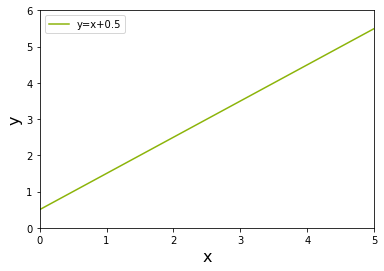

In [4]:
# Call the function
plot_line()


**Part B**: We have, in many courses in past years, called $\color{green}{x}$ the $\color{green}{\text{independent}}$ variable and $\color{red}{y}$ the $\color{red}{\text{dependent}}$ variable.

Here, we'll introduce some new words: We will sometimes call $\color{green}{x}$ the $\color{green}{\text{predictor}}$ or the $\color{green}{\text{explanatory}}$ variable. In machine learning, the vocabulary word that you may hear is that $\color{green}{x}$ is a $\color{green}{\text{feature}}$. 

On the other hand $\color{red}{y}$, the $\color{red}{\text{dependent}}$ variable, may be called the $\color{red}{\text{response}}$ variable. 

Normally, when we plot lines, for a given independent variable $x$, there is a fixed $y$. But in real-world scenarios, we don't just get $y$ back. We often get $y$ back with $\color{blue}{\text{noise}}$.

Write a function that takes in values of $x$, $\alpha$, and $\beta$ below, and returns 
$$ y = \alpha + \beta x + \color{blue}{\epsilon}$$
where $\epsilon$ is drawn from a Normal distribution with mean of $0$ and variance of $\sigma^2$. Be sure to allow your function to take the variance as an input, too.

In [5]:
# This function returns an array of 'noise' values.
# The inputs are y-intercept (a), slope (b), an
#  array of values (x), and a variance (var).
def y_noisy(a,b,x,var):
    
    # 'noise' is an array of size=len(x) holding randomly chose
    #  values from a normal distribution with mu=0, SD=sqrt(var).
    noise = stats.norm.rvs(loc=0, scale=np.sqrt(var), size=len(x))
    
    # The return is an array of y-values each with a different 
    #  epsilon added on to each value.
    return a+x*b+noise


**Part C**: Use your function from Part B to make a plot of this noise-added data, for $x \in [0,5]$, with 25 evenly spaced values.

On top of these noisy values, plot the $\color{green}{\text{noise-free values}}$, like you did in Part A.

Looking ahead, it will be nice if you can easily change the slope, intercept, number of points, and noise levels for this plot, so please write a function that allows you to, for now, plot with the parameters discussed so far. 

In [6]:
# This function returns a scatterplot AND a line throught the dots.
def plot_line_noisy(var=1,alpha=1,beta=1,n_points=25):
    
    # 'x' is an array holding 'n_points' amount of values.
    x = np.linspace(0,5,n_points)
    
    # 'y' is an array holding the y-values from our previous
    #  function with noise added on.
    y = y_noisy(alpha,beta,x,var)
    
    # Initialize the graph.
    fig, ax = plt.subplots()
    
    # Create the scatterplot.
    scatter = ax.scatter(x,y,color=almostblack,marker='o',label="y=x+0.5+noise")
    
    # Create the true line without the noise.
    line = ax.plot(x,alpha*x+beta,color=mycolor,label="y=x+0.5")

    # Make the graph pretty.
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    plt.legend()

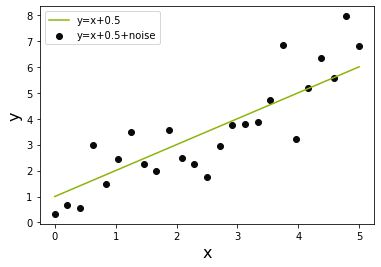

In [7]:
plot_line_noisy(var=1)

**Part D**: Slowly increase the value of the variance of the noise, and create a few more plots. Comment on what you notice.

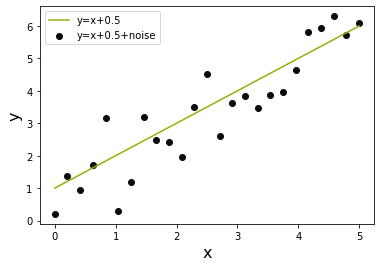

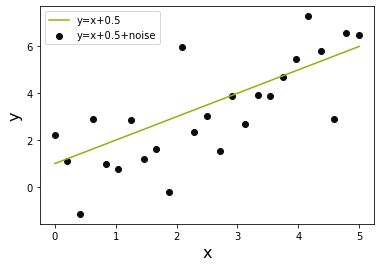

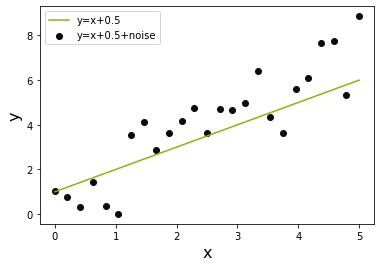

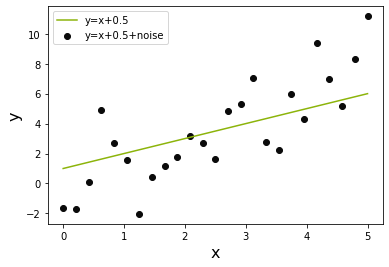

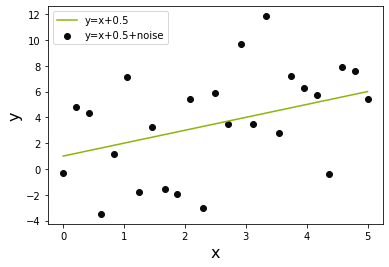

In [8]:
plot_line_noisy(var=.5)
plot_line_noisy(var=2)
plot_line_noisy(var=4)
plot_line_noisy(var=8)
plot_line_noisy(var=16)

As 'noise' (variance of $\epsilon$) increases the line really loses it ability to describe the data. There isn't much of a linear trend left as noise increases. A line is not a very convincing representation of the data.

## Exercise 2: Repeat-o-fit

**Part A**: Code up a function that takes in sets of matched x and y values and returns the linear regression parameters $\hat{\alpha}$ and $\hat{\beta}$.

Recall:

$\phantom{xxx} \Large{y=\alpha+\beta\cdot x+\epsilon}$

$\phantom{xxx}\Large{\beta=\frac{\bar{x}\cdot\bar{y}-\overline{x\cdot y}}{\overline{x^2}-(\bar{x})^2}}\phantom{xxx}$       or       $\phantom{xxx}\Large{\beta = \frac{\sum{(x-\bar{x})\cdot(y-\bar{y})}}{\sum{(x-\bar{x})^2}}}$

$\phantom{xxx}\Large{\alpha=\bar{y}-\beta\cdot \bar{x}}$


In [9]:
# This function takes 2 arrays called x and y
# This function will return the line of best fit, specifically it
#  returns the y-intercept (alpha), the slope (beta), and 
#   an array of y-values (yhat) from the line of best fit. 
def regression(x,y):
    # 'xbar' and 'ybar' are variables holding the mean of
    #  the x-values and the y-values.
    xbar = x.mean()
    ybar = y.mean()
    
    # 'numerator' is the numerator of beta.
    numerator = np.array((x-xbar)*(y-ybar)).sum()
    
    # 'denominator' is the denominator of beta.
    denominator = np.array((x-xbar)*(x-xbar)).sum()
    
    # Calculate the beta value.
    beta = numerator/denominator
    
    # Calculate the alpha value.
    alpha = ybar - beta*xbar
    
    # 'yhat' is an array of y-values from the line of best fit.
    yhat = alpha + beta*x
    
    # Return the y-intercept, the slope, and the array of y-values.
    return alpha,beta,yhat


**Part B**: Using your functions from Exercise 1, consider 10 equally-spaced values of x between 0 and 5, and add noise to a line with slope 2 and intercept 0.5.  Let the variance of the noise be 2. 

Then, fit the points using your function from Part A. On the same axes, create a plot of 
- the noisy points 
- your best fit line
- the original line

In [10]:
# This function will draw a linear equation,
#  the same points from the linear equation but with noise,
#  and the line of best fit.
def draw_reg(num_points, var):
    
    # The array of x-values.
    x = np.linspace(0,5,num_points)
    
    # Plot the y-values with random noise.
    y = y_noisy(0.5,2,x,var)
    
    # 'ytrue' is the line without noise.
    ytrue = 0.5+2*x
    
    # Call your regression function with its
    #  three returns (2 constants, 1 array)
    alpha,beta,yhat = regression(x,y)
    
    # Initialize the graph.
    fig, ax = plt.subplots()
    
    # Create a scatterplot of the 'x' and 'y' values.
    scatter = ax.scatter(x,y,color=almostblack,marker='o',label="data")
    
    # Plot the line of best fit.
    line = ax.plot(x,yhat,color=mycolor,label="LS fit")
    
    # Plot the actual line used to create the data, y=0.5+2x. This is
    #  the line without the noise (seen in black dashes).
    line2 = ax.plot(x,ytrue,color=almostblack,label="Model",linestyle='--')
    
    # Make the graph pretty.
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    plt.legend()
    

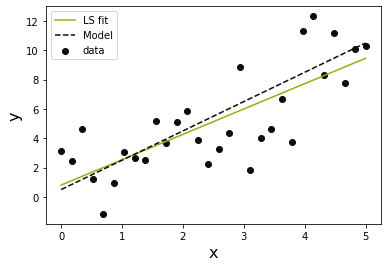

In [14]:
draw_reg(num_points=30, var=5)

**Part C** Repeatedly redraw your plot from Part B and note the accuracies of the slope and intercept estimates. Experiment with changing the $\color{blue}{\text{number of points}}$, previously set to 10. Experiment with $\color{blue}{\text{changing the variance}}$ of the noise. What do you notice?

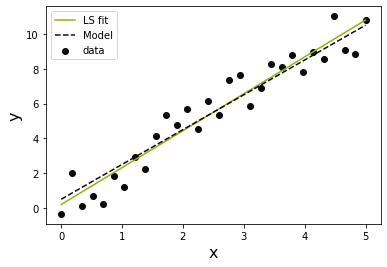

In [15]:
num_points=30
var=1

draw_reg(num_points, var)

Solution:

$\color{red}{\text{Increasing the number of points}}$ appears to increase the accuracy of the best-fit line.

$\color{red}{\text{Decreasing the variance}}$ also appears to increase the accuracy of the best-fit line.

**Part D**: When plotting, the alpha parameter controls the transparency of the line. Use an alpha of 0.05 to plot the best-fit lines of 500 separate datasets with $\alpha=0.5$, $\beta=0.5$, $\sigma^2=2$, and $x \in [0,5]$ in 10 evenly spaced points.  

Do not plot the points used for regression; only the best-fit lines.

On top of these, plot the true line, with no noise. 

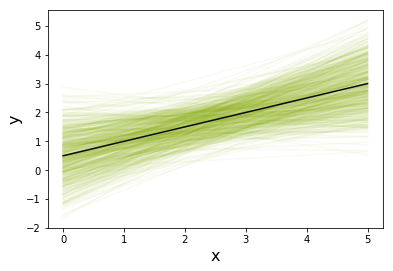

In [25]:
# 'x' is an array holding 10 values, evenly spaced, between 0 and 5.
x = np.linspace(0,5,10)

# Initialize the graph.
fig, ax = plt.subplots()

# This loop plots 500 lines each with different random noise
for ii in range(500):
    
    # 'y' is our array filled with noisy values.
    y = y_noisy(0.5,0.5,x,var=2)
    
    # Get the three returns from our function 'regression'.
    alpha,beta,yhat = regression(x,y)
    
    # Plot the line of best fit in green (500 times).
    ax.plot(x,yhat,color=mycolor,alpha=0.05)
    
# Plot the actual line in black.
ax.plot(x,0.5+0.5*x,color=almostblack)

# Make the graph pretty; label the axis.
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16);